# pandas

<font color=blue>知らなかった機能についてメモ</font>

In [1]:
import os
import pandas as pd
import numpy as np

## データ抽出

<font color=blue>忘れがち</font>

In [2]:
df = pd.DataFrame(np.arange(12).reshape(4,3),
                 columns=['c1', 'c2', 'c3'],
                 index=['i1', 'i2', 'i3', 'i4'])
df

,c1,c2,c3
i1,0,1,2
i2,3,4,5
i3,6,7,8
i4,9,10,11


In [3]:
# column名で1列抽出
df['c1']

i1    0
i2    3
i3    6
i4    9
Name: c1, dtype: int64

In [4]:
# column名で2列抽出
df[['c1', 'c2']]

,c1,c2
i1,0,1
i2,3,4
i3,6,7
i4,9,10


In [5]:
# 連続したcolumn でなくても良い
df[['c1', 'c3']]

,c1,c3
i1,0,2
i2,3,5
i3,6,8
i4,9,11


In [6]:
# インデックスで行を抽出
df[:2]

,c1,c2,c3
i1,0,1,2
i2,3,4,5


In [7]:
# index名で１行抽出
df.loc['i1']

c1    0
c2    1
c3    2
Name: i1, dtype: int64

In [8]:
# 同じ結果
df.loc['i1', :]

c1    0
c2    1
c3    2
Name: i1, dtype: int64

In [9]:
# index, column 名を指定して抽出
df.loc[['i1', 'i3'], ['c1', 'c3']]

,c1,c3
i1,0,2
i3,6,8


## データの読み込み

### WebサイトのHTMLから表を抽出

[(Wikipedia) トップレベルドメイン一覧](https://ja.wikipedia.org/wiki/%E3%83%88%E3%83%83%E3%83%97%E3%83%AC%E3%83%99%E3%83%AB%E3%83%89%E3%83%A1%E3%82%A4%E3%83%B3%E4%B8%80%E8%A6%A7) 

In [10]:
# url にある table 要素を全て抜き出し
url = 'https://ja.wikipedia.org/wiki/%E3%83%88%E3%83%83%E3%83%97%E3%83%AC%E3%83%99%E3%83%AB%E3%83%89%E3%83%A1%E3%82%A4%E3%83%B3%E4%B8%80%E8%A6%A7'
tables = pd.read_html(url)

In [11]:
# table 要素がいくつあるか
len(tables)

43

In [12]:
type(tables)

list

In [13]:
df_t4 = tables[4]
df_t4

,Name,Entity,Explanation,Notes,IDN,DNSSEC,SLD,IPv6
0,.ac,アセンション島,NaN,広く学術的なサイト（大学など）のために用いられる。アセンション島はイギリス領であるが、イギリ...,Yes,Yes,Yes,Yes
1,.ad,アンドラ,NaN,アンドラにおける商標または市民権が必要となる[7][8]。,NaN,Yes,Yes,NaN
2,.ae,アラブ首長国連邦,NaN,NaN,NaN,No,Yes,NaN
3,.af,アフガニスタン,NaN,NaN,NaN,Yes,Yes,NaN
4,.ag,アンティグア・バーブーダ,NaN,AGがドイツの株式会社(Aktiengesellschaft)の略称であることから、非公式に...,NaN,Yes,Yes,NaN
...,...,...,...,...,...,...,...,...
248,.ye,イエメン,NaN,NaN,NaN,No,No,NaN
249,.yt,マヨット島,NaN,欧州連合・スイス・ノルウェー・アイスランド・リヒテンシュタインの個人・企業に限る[cctld...,Yes[cctld 12],Yes,Yes,NaN
250,.za,南アフリカ,Zuid-Afrika (オランダ語),NaN,NaN,No,No,NaN
251,.zm,ザンビア,NaN,NaN,NaN,Yes,Yes[cctld 28],NaN


In [14]:
# 試しに保存
os.makedirs('./pandas_sample_dir', exist_ok=True)
for i, df in enumerate(tables):
    df.to_csv(os.path.join('./pandas_sample_dir', 'table_{}.csv'.format(i)))
print('done')

done


In [15]:
!ls -1 ./pandas_sample_dir

table_0.csv
table_1.csv
table_10.csv
table_11.csv
table_12.csv
table_13.csv
table_14.csv
table_15.csv
table_16.csv
table_17.csv
table_18.csv
table_19.csv
table_2.csv
table_20.csv
table_21.csv
table_22.csv
table_23.csv
table_24.csv
table_25.csv
table_26.csv
table_27.csv
table_28.csv
table_29.csv
table_3.csv
table_30.csv
table_31.csv
table_32.csv
table_33.csv
table_34.csv
table_35.csv
table_36.csv
table_37.csv
table_38.csv
table_39.csv
table_4.csv
table_40.csv
table_41.csv
table_42.csv
table_5.csv
table_6.csv
table_7.csv
table_8.csv
table_9.csv


## データ整形

### 条件で抽出

In [16]:
df_t4.head()

,Name,Entity,Explanation,Notes,IDN,DNSSEC,SLD,IPv6
0,.ac,アセンション島,NaN,広く学術的なサイト（大学など）のために用いられる。アセンション島はイギリス領であるが、イギリ...,Yes,Yes,Yes,Yes
1,.ad,アンドラ,NaN,アンドラにおける商標または市民権が必要となる[7][8]。,NaN,Yes,Yes,NaN
2,.ae,アラブ首長国連邦,NaN,NaN,NaN,No,Yes,NaN
3,.af,アフガニスタン,NaN,NaN,NaN,Yes,Yes,NaN
4,.ag,アンティグア・バーブーダ,NaN,AGがドイツの株式会社(Aktiengesellschaft)の略称であることから、非公式に...,NaN,Yes,Yes,NaN


In [17]:
# SQL のように条件を書き抽出できる
df_t4.query('IDN == "Yes" and DNSSEC == "Yes"')

,Name,Entity,Explanation,Notes,IDN,DNSSEC,SLD,IPv6
0,.ac,アセンション島,NaN,広く学術的なサイト（大学など）のために用いられる。アセンション島はイギリス領であるが、イギリ...,Yes,Yes,Yes,Yes
46,.cl,チリ,NaN,NaN,Yes,Yes,Yes,Yes
102,.id,インドネシア,NaN,"インドネシアの企業(co.id)、団体(or.id)、学術機関(ac.id, sch.id)...",Yes,Yes,Yes,NaN
110,.is,アイスランド,Ísland,NaN,Yes,Yes,Yes,NaN
123,.kr,韓国,NaN,NaN,Yes,Yes,Yes,NaN
131,.li,リヒテンシュタイン,NaN,ニューヨーク州ロングアイランドでも使用されている。,Yes,Yes,Yes,NaN
135,.lt,リトアニア,NaN,NaN,Yes,Yes,Yes,NaN
136,.lu,ルクセンブルク,NaN,NaN,Yes,Yes,Yes,NaN
137,.lv,ラトビア,NaN,NaN,Yes,Yes,Yes,NaN
168,.no,ノルウェー,NaN,ノルウェーで登録されている団体、またはノルウェーで住民登録された18歳以上の個人で、ノルウェ...,Yes,Yes,Yes,NaN


## 時系列データ

In [18]:
# 一ヶ月分のデータ
pd.date_range(start='2021-03-01', end='2021-03-31')

DatetimeIndex(['2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08',
               '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12',
               '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
               '2021-03-29', '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', freq='D')

In [19]:
# 一年分のデータ
pd.date_range(start='2021-01-01', periods=365)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [20]:
# 一年分の土曜日のデータ
pd.date_range(start='2021-01-01', end='2021-12-31', freq='W-SAT')

DatetimeIndex(['2021-01-02', '2021-01-09', '2021-01-16', '2021-01-23',
               '2021-01-30', '2021-02-06', '2021-02-13', '2021-02-20',
               '2021-02-27', '2021-03-06', '2021-03-13', '2021-03-20',
               '2021-03-27', '2021-04-03', '2021-04-10', '2021-04-17',
               '2021-04-24', '2021-05-01', '2021-05-08', '2021-05-15',
               '2021-05-22', '2021-05-29', '2021-06-05', '2021-06-12',
               '2021-06-19', '2021-06-26', '2021-07-03', '2021-07-10',
               '2021-07-17', '2021-07-24', '2021-07-31', '2021-08-07',
               '2021-08-14', '2021-08-21', '2021-08-28', '2021-09-04',
               '2021-09-11', '2021-09-18', '2021-09-25', '2021-10-02',
               '2021-10-09', '2021-10-16', '2021-10-23', '2021-10-30',
               '2021-11-06', '2021-11-13', '2021-11-20', '2021-11-27',
               '2021-12-04', '2021-12-11', '2021-12-18', '2021-12-25'],
              dtype='datetime64[ns]', freq='W-SAT')

In [21]:
# 時系列データをindexに
dates = pd.date_range(start='2021-01-01', periods=365)
np.random.seed(123)
df = pd.DataFrame(np.random.randint(1, 31, 365),
                 index=dates,
                 columns=['random'])
df

,random
2021-01-01,14
2021-01-02,3
2021-01-03,29
2021-01-04,3
2021-01-05,7
...,...
2021-12-27,22
2021-12-28,5
2021-12-29,22
2021-12-30,1


In [22]:
df.describe()

,random
count,365.000000
mean,15.221918
std,8.728982
min,1.000000
25%,7.000000
50%,15.000000
75%,23.000000
max,30.000000


In [23]:
# 月平均, pd.Grouper(freq='M')で月毎のグループに分けられる
df.groupby(pd.Grouper(freq='M')).mean()

,random
2021-01-31,13.774194
2021-02-28,13.428571
2021-03-31,15.612903
2021-04-30,15.533333
2021-05-31,15.322581
2021-06-30,14.300000
2021-07-31,15.258065
2021-08-31,16.129032
2021-09-30,18.433333
2021-10-31,14.580645


## 欠損値処理

In [24]:
df_t4.head()

,Name,Entity,Explanation,Notes,IDN,DNSSEC,SLD,IPv6
0,.ac,アセンション島,NaN,広く学術的なサイト（大学など）のために用いられる。アセンション島はイギリス領であるが、イギリ...,Yes,Yes,Yes,Yes
1,.ad,アンドラ,NaN,アンドラにおける商標または市民権が必要となる[7][8]。,NaN,Yes,Yes,NaN
2,.ae,アラブ首長国連邦,NaN,NaN,NaN,No,Yes,NaN
3,.af,アフガニスタン,NaN,NaN,NaN,Yes,Yes,NaN
4,.ag,アンティグア・バーブーダ,NaN,AGがドイツの株式会社(Aktiengesellschaft)の略称であることから、非公式に...,NaN,Yes,Yes,NaN


In [25]:
df_t4.dropna()

,Name,Entity,Explanation,Notes,IDN,DNSSEC,SLD,IPv6
57,.de,ドイツ,Deutschland,ドイツ国内の連絡先が必要。,Yes[cctld 6],Yes,Yes,Yes


In [26]:
# 欠損値を全て0に
df_t4_fillna = df_t4.fillna(0)
df_t4_fillna.head()

,Name,Entity,Explanation,Notes,IDN,DNSSEC,SLD,IPv6
0,.ac,アセンション島,0,広く学術的なサイト（大学など）のために用いられる。アセンション島はイギリス領であるが、イギリ...,Yes,Yes,Yes,Yes
1,.ad,アンドラ,0,アンドラにおける商標または市民権が必要となる[7][8]。,0,Yes,Yes,0
2,.ae,アラブ首長国連邦,0,0,0,No,Yes,0
3,.af,アフガニスタン,0,0,0,Yes,Yes,0
4,.ag,アンティグア・バーブーダ,0,AGがドイツの株式会社(Aktiengesellschaft)の略称であることから、非公式に...,0,Yes,Yes,0


In [27]:
# 欠損値を一つ手前の値に
# 一つ前の値がNaNならずっとNaN
df_t4_fill = df_t4.fillna(method='ffill')
df_t4_fill.head()

,Name,Entity,Explanation,Notes,IDN,DNSSEC,SLD,IPv6
0,.ac,アセンション島,NaN,広く学術的なサイト（大学など）のために用いられる。アセンション島はイギリス領であるが、イギリ...,Yes,Yes,Yes,Yes
1,.ad,アンドラ,NaN,アンドラにおける商標または市民権が必要となる[7][8]。,Yes,Yes,Yes,Yes
2,.ae,アラブ首長国連邦,NaN,アンドラにおける商標または市民権が必要となる[7][8]。,Yes,No,Yes,Yes
3,.af,アフガニスタン,NaN,アンドラにおける商標または市民権が必要となる[7][8]。,Yes,Yes,Yes,Yes
4,.ag,アンティグア・バーブーダ,NaN,AGがドイツの株式会社(Aktiengesellschaft)の略称であることから、非公式に...,Yes,Yes,Yes,Yes


In [28]:
# 欠損値を平均値に
# 数値ではないからわかりにくい
df_t4_fillmean = df_t4.fillna(df_t4_fill.mean())
df_t4_fillmean.head()

,Name,Entity,Explanation,Notes,IDN,DNSSEC,SLD,IPv6
0,.ac,アセンション島,NaN,広く学術的なサイト（大学など）のために用いられる。アセンション島はイギリス領であるが、イギリ...,Yes,Yes,Yes,Yes
1,.ad,アンドラ,NaN,アンドラにおける商標または市民権が必要となる[7][8]。,NaN,Yes,Yes,NaN
2,.ae,アラブ首長国連邦,NaN,NaN,NaN,No,Yes,NaN
3,.af,アフガニスタン,NaN,NaN,NaN,Yes,Yes,NaN
4,.ag,アンティグア・バーブーダ,NaN,AGがドイツの株式会社(Aktiengesellschaft)の略称であることから、非公式に...,NaN,Yes,Yes,NaN


## 統計データの扱い

In [29]:
R = 100
C = 10
np.random.seed(123)
datas = np.random.randn(R, C)
df_r = pd.DataFrame(datas,
                   columns=[f'c{i}' for i in range(C)],
                   index=[f'i{j}' for j in range(R)])
df_r

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
i0,-1.085631,0.997345,0.282978,-1.506295,-0.578600,1.651437,-2.426679,-0.428913,1.265936,-0.866740
i1,-0.678886,-0.094709,1.491390,-0.638902,-0.443982,-0.434351,2.205930,2.186786,1.004054,0.386186
i2,0.737369,1.490732,-0.935834,1.175829,-1.253881,-0.637752,0.907105,-1.428681,-0.140069,-0.861755
i3,-0.255619,-2.798589,-1.771533,-0.699877,0.927462,-0.173636,0.002846,0.688223,-0.879536,0.283627
i4,-0.805367,-1.727669,-0.390900,0.573806,0.338589,-0.011830,2.392365,0.412912,0.978736,2.238143
...,...,...,...,...,...,...,...,...,...,...
i95,-0.692923,-0.778272,0.472775,0.650155,0.238501,-2.050218,0.296359,0.565397,-0.669206,0.043251
i96,-1.863884,-1.229969,-0.324235,-0.309751,0.351679,-1.186925,-0.341206,-0.489780,0.528010,1.421043
i97,1.720920,-1.568440,-0.048014,-1.112529,-0.064745,0.422919,0.081491,-0.049012,1.483039,0.720989
i98,-0.272654,0.024211,0.870898,0.609791,-0.425076,-1.775243,-1.184657,0.145979,-1.786527,-0.152394


In [30]:
# 要約、代表的な統計量の表示
df_r.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.056042,-0.149626,-0.099788,-0.229676,-0.087318,0.070677,-0.002912,-0.033116,0.035225,0.156935
std,1.050139,1.067289,0.992600,0.962057,0.947159,0.979259,1.030373,0.987386,1.049328,0.925830
min,-3.167055,-2.798589,-2.631438,-2.236169,-2.794472,-3.231055,-2.788113,-2.272618,-2.438461,-2.443076
25%,-0.808442,-0.927194,-0.700216,-0.941828,-0.556132,-0.454026,-0.695523,-0.657250,-0.649259,-0.349694
50%,-0.023793,-0.173771,-0.246010,-0.282310,-0.044903,0.053700,0.024168,-0.042309,0.068957,0.156187
75%,0.681064,0.669610,0.582522,0.486718,0.616545,0.781443,0.659091,0.591676,0.823227,0.694898
max,2.766603,3.571579,2.200702,2.598304,1.716040,1.984582,2.392365,2.186786,2.250676,2.958625


In [31]:
# 相関係数の表示
df_r.corr()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
c0,1.000000,-0.001412,0.096392,0.051115,0.033502,-0.061964,-0.168699,-0.118566,-0.117948,-0.094295
c1,-0.001412,1.000000,0.008705,-0.137054,-0.054462,-0.012606,0.079513,-0.010033,0.061302,-0.177721
c2,0.096392,0.008705,1.000000,0.047796,-0.113381,0.011116,0.055853,-0.065468,0.031317,-0.009128
c3,0.051115,-0.137054,0.047796,1.000000,0.103129,-0.079130,-0.035161,-0.264360,0.032118,-0.149639
c4,0.033502,-0.054462,-0.113381,0.103129,1.000000,-0.032127,0.027136,0.039272,0.187798,0.017617
c5,-0.061964,-0.012606,0.011116,-0.079130,-0.032127,1.000000,0.021382,0.072186,0.306450,0.062519
c6,-0.168699,0.079513,0.055853,-0.035161,0.027136,0.021382,1.000000,-0.022103,0.113924,0.201856
c7,-0.118566,-0.010033,-0.065468,-0.264360,0.039272,0.072186,-0.022103,1.000000,0.007560,0.000657
c8,-0.117948,0.061302,0.031317,0.032118,0.187798,0.306450,0.113924,0.007560,1.000000,0.059499
c9,-0.094295,-0.177721,-0.009128,-0.149639,0.017617,0.062519,0.201856,0.000657,0.059499,1.000000


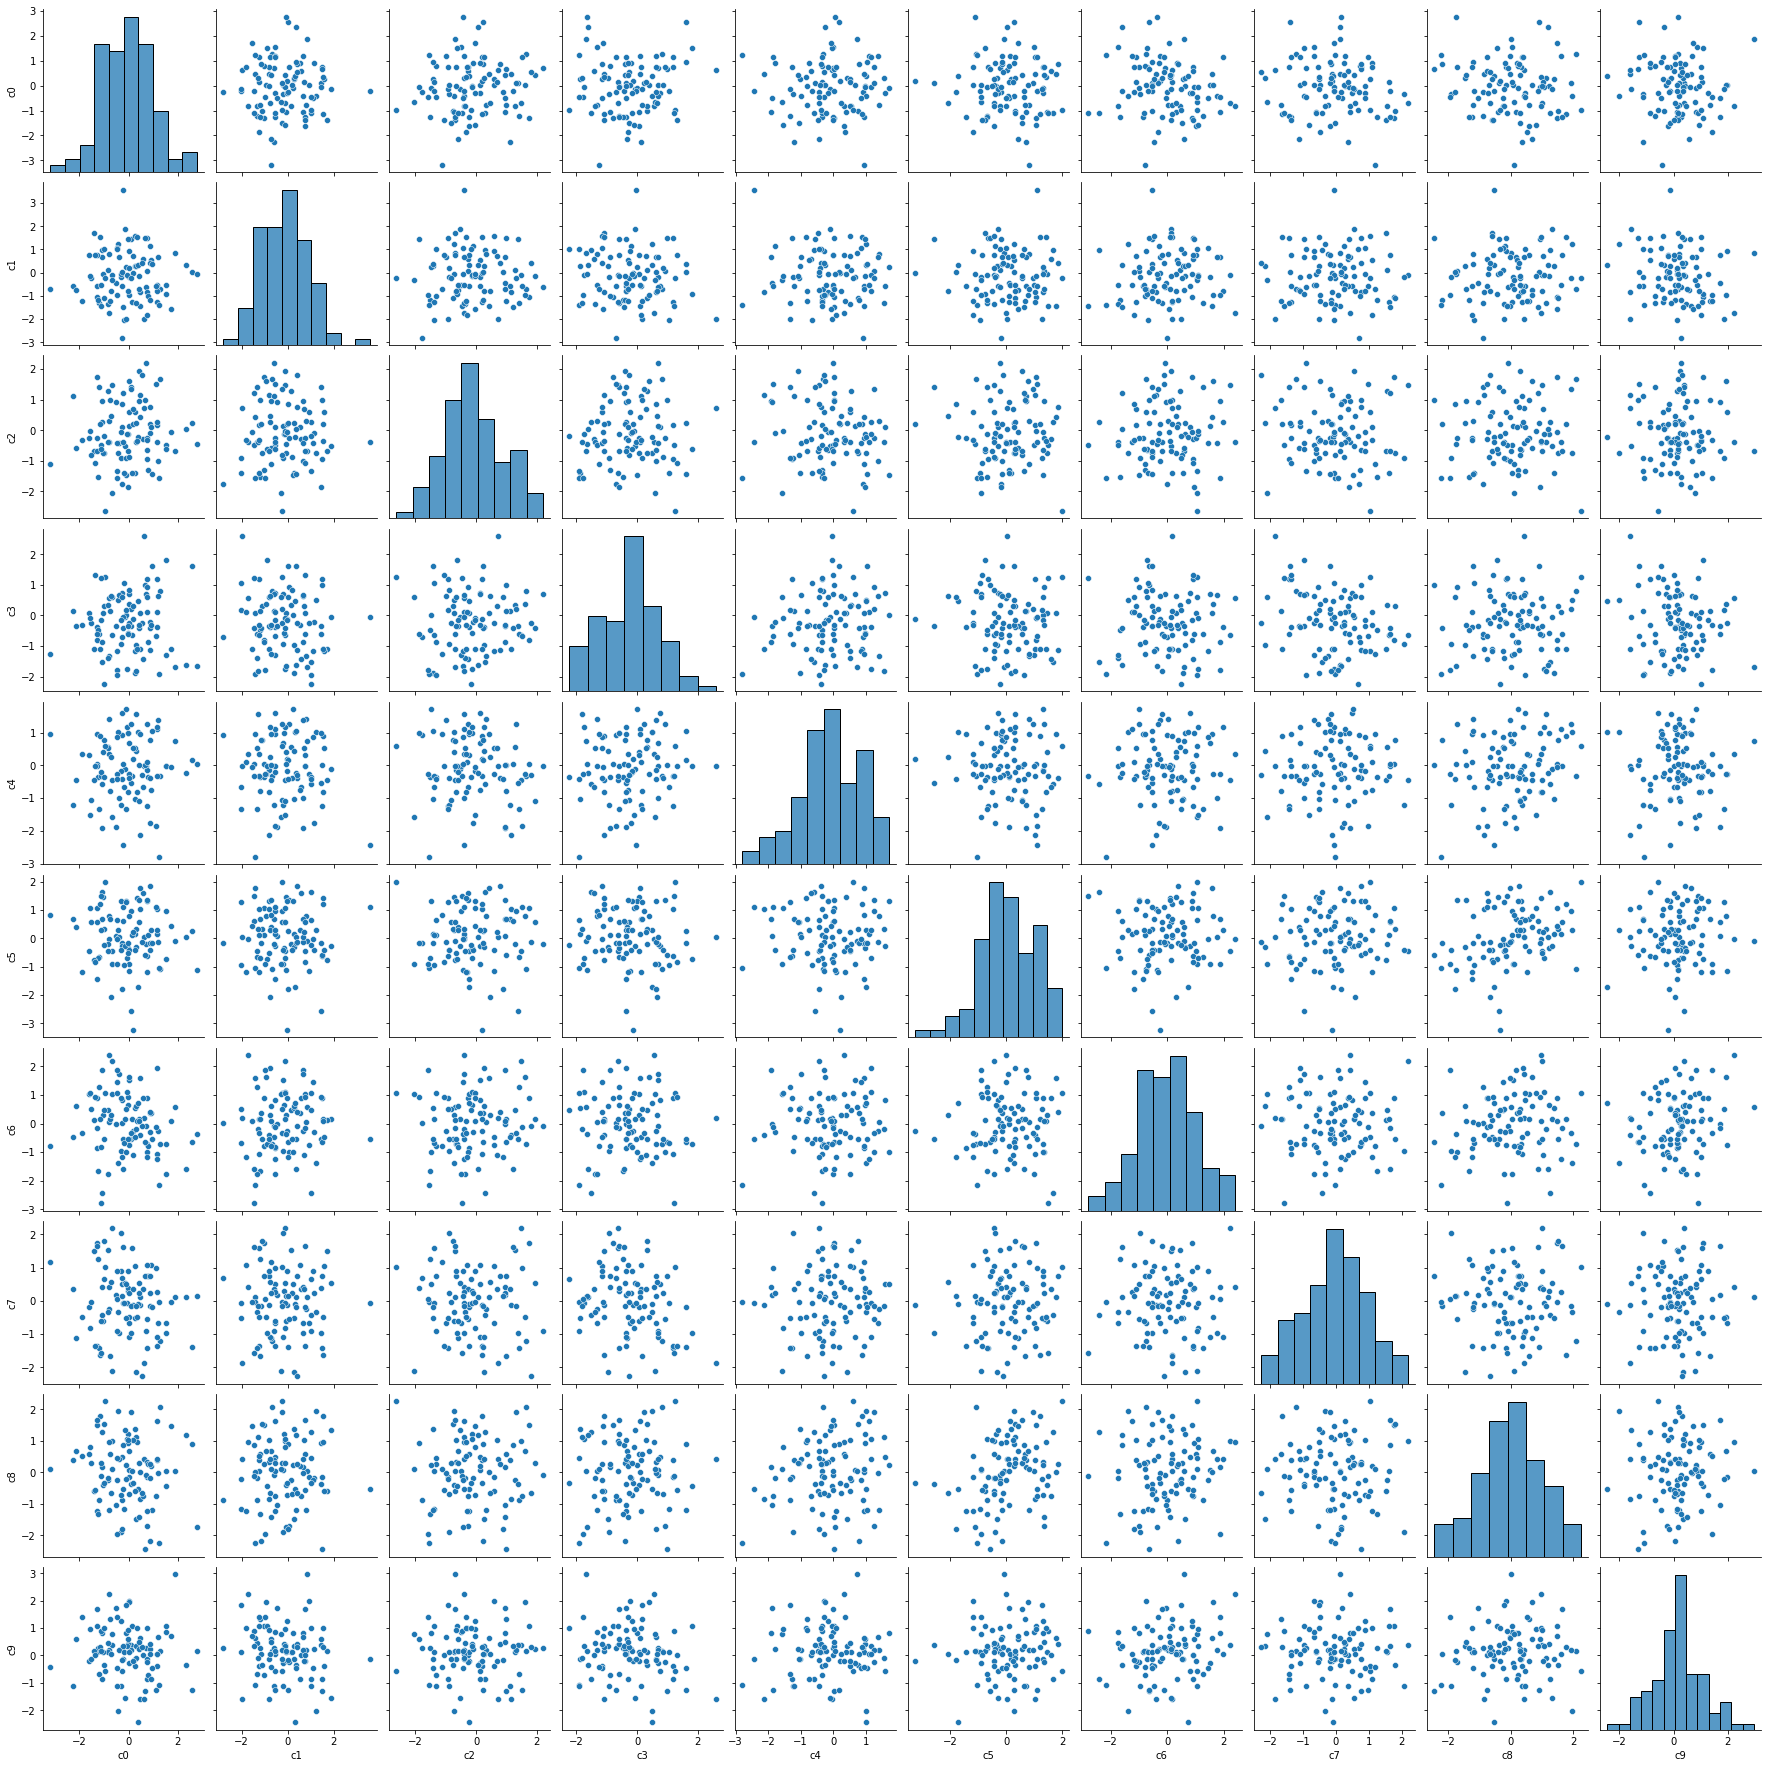

In [32]:
# 相関を目視で確認
%matplotlib inline
import seaborn as sns
sns.pairplot(df_r)

<font color=blue>当たり前だが、乱数を取っているので相関はない</font>

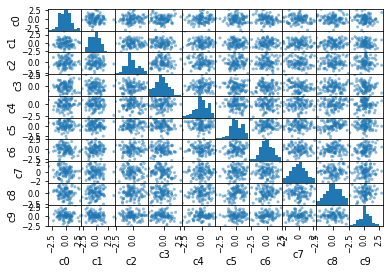

In [33]:
# pandas でも同じことができる
from pandas.plotting import scatter_matrix
_ = scatter_matrix(df_r)

<font color=blue>
引数で調整できるかもしれないが、seabornの方が綺麗に描画できた。<br>
例えば重回帰分析などで、c9 を説明変数とした時、<br>
c0 ~ c8 の中から相関の強い目的変数を選ぶことができる。
</font>